In [ ]:
import pandas as pd

import numpy as np

import joblib

#matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

#preparación: dividir datos en train y test
from sklearn.model_selection import train_test_split
#preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Regresion Logistica
from sklearn.linear_model import LogisticRegression

#Evaluar
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np





from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Carga y Exploración de Datos:

In [ ]:
#Cargar el dataset y revisar la estructura básica.
path= "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/BBDD/WineQT.csv"
df = pd.read_csv(path)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:

df.replace('?', np.nan, inplace=True)


In [ ]:
df.duplicated().sum() #no hay datos duplicados

np.int64(0)

In [ ]:
#Descripción de las variables y su distribución.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
#Detección y tratamiento de valores nulos.
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df = df.drop(columns=['Id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


#  2. Preprocesamiento de Datos:

In [ ]:
# Definir features y target.
X = df.drop(columns="quality")
y = df["quality"]

In [ ]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir transformadores.
num_cols = X.columns


preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols)])

#  3. Entrenamiento de Modelos de Clasificación:

## 3.1 Regresión Logística

In [ ]:
# Pipeline con logistic regression.
pipeline_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))  # max_iter por defecto 100.
])

In [ ]:
# Entrenar.
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
#Predecir
y_pred_logreg = pipeline_logreg.predict(X_test)

## 3.2 K-Nearest Neighbors (KNN):

In [ ]:
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=10))
])

In [ ]:
#entrenar
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
y_pred_knn = pipeline_knn.predict(X_test)

## 3.3  RandomForest

In [ ]:
# Pipeline.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# Entrenar.
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predecir.
y_pred_rf = pipeline_rf.predict(X_test)

# 4. Evaluación de Modelos & ##  5. Análisis y Comparación de Resultados:

## 4.1 Regresion Logistica


In [ ]:
print("Accuracy RL model:", accuracy_score(y_test, y_pred_logreg))

Accuracy RL model: 0.62882096069869


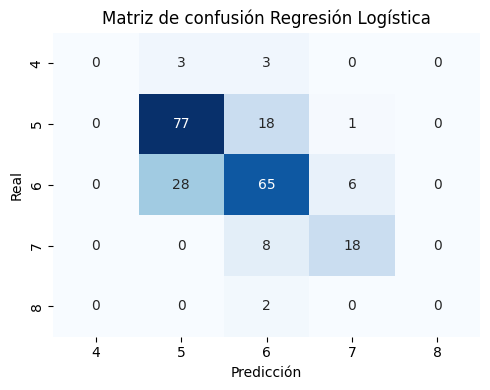

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
clases = np.unique(y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clases,
            yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión Regresión Logística")
plt.tight_layout()
plt.show()

La mayoría de las predicciones correctas están en calidad 5 (77), 6 (65) y 7 (18).

La calidad 5 tiene bastante confusión con la calidad 6 (18 veces se predijo 6 cuando era 5).

La calidad 6 también muestra confusión importante con la calidad 5 (28 veces) y con clase 7 (6 veces).

Las calidades 4 y 8 tienen muy pocos ejemplos o predicciones.

## 4.2 KNN


In [ ]:

print("Accuracy KNN model:", accuracy_score(y_test, y_pred_knn))

Accuracy KNN model: 0.5938864628820961


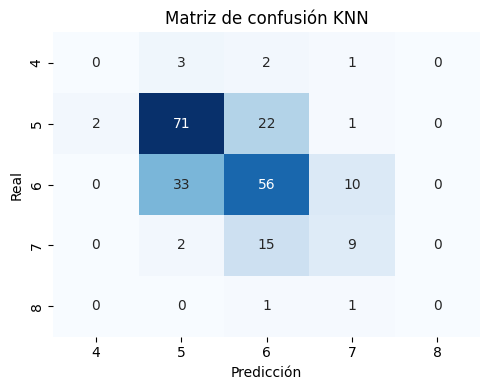

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

clases = np.unique(y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clases,
            yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión KNN")
plt.tight_layout()
plt.show()

Para este modelo la calidad de vino 5 tiene una confusión mayor con los de calidad 6 (22 veces) que el modelo anterior.

La calidad 6 tiene menos predicciones correctas (56) y más errores hacia la calidad 5 (33) y 7 (10).

La calidad 7 tiene más confusión con las calidades 6 y 5, mostrando que el modelo tiene dificultades para diferenciar estas calidades cercanas.


## 4.3 Random Forest

In [ ]:
print("Accuracy RF model:", accuracy_score(y_test, y_pred_rf))

Accuracy RF model: 0.6986899563318777


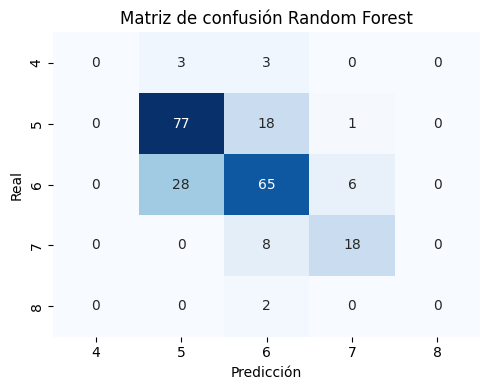

In [ ]:
cm_rf= confusion_matrix(y_test, y_pred_rf)

clases = np.unique(y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clases,
            yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión Random Forest")
plt.tight_layout()
plt.show()

Muy similar a la matriz de confusión del modelo de regresión logística

Buen comportamiento del modelo al predecir las calidades 5 y 6.
